In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
players = pd.read_csv("Data/nba_players_stats/Players.csv")

In [4]:
season_stats = pd.read_csv("Data/nba_players_stats/Seasons_Stats.csv")

In [6]:
season_stats.columns

Index([u'Unnamed: 0', u'Year', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS',
       u'MP', u'PER', u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%',
       u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'blanl', u'OWS', u'DWS',
       u'WS', u'WS/48', u'blank2', u'OBPM', u'DBPM', u'BPM', u'VORP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PTS'],
      dtype='object')

## Advanced stats for MVPs in last 10 years

In [10]:
mvp_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Kevin Durant')]
mvp_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Derrick Rose')]
mvp_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kobe Bryant')]
mvp_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Dirk Nowitzki')]

mvps = [mvp_2007, mvp_2008, mvp_2009, mvp_2010, mvp_2011, mvp_2012, mvp_2013, mvp_2014, mvp_2015, mvp_2016]

#### To be worked on later

## Defensive vs offensive stats for top 30 players in BPM

In [82]:
curr_season = season_stats.loc[season_stats['Year'] == 2017.0]

In [95]:
def remove_duplicate_players(data_frame):
    """
    Removes duplicate rows of players which played for multiple teams during the season, meaning if player
    started the season with Toronto and ended in Houston, he'd be mentioned three times in data frame, as a member
    of TOR, HOU and TOT where TOT is all stats together. After this method, only row with TOT will remain
    
    @param data_frame table which represents season
    """
    # Removes duplicate players, only leaves TOT team (if player was traded through season)
    player_occurrences = {}
    for i in range(len(data_frame)):
        player_name = data_frame.iloc[i]['Player']
        player_team = data_frame.iloc[i]['Tm']
        index_row = data_frame.index[i]
        if player_name not in player_occurrences:
            player_occurrences[player_name] = []
        player_occurrences[player_name].append((player_team, index_row))

    for key in player_occurrences:
        curr_list = player_occurrences[key]
        if len(curr_list) == 1:
            continue
        for team, index in curr_list:
            if team != "TOT":
                data_frame = data_frame.drop(index)
    return data_frame

In [185]:
curr_season = remove_duplicate_players(curr_season)
curr_season = curr_season.loc[curr_season['MP'] >= 1400.0]

In [304]:
bpm_sorted = curr_season.sort_values(by='BPM', ascending=False)
len(bpm_sorted)

194

In [305]:
top_bpm = bpm_sorted[:194]

In [306]:
filtered_top_bpm = top_bpm.loc[:, ['Player', 'OBPM', 'DBPM', 'BPM']]

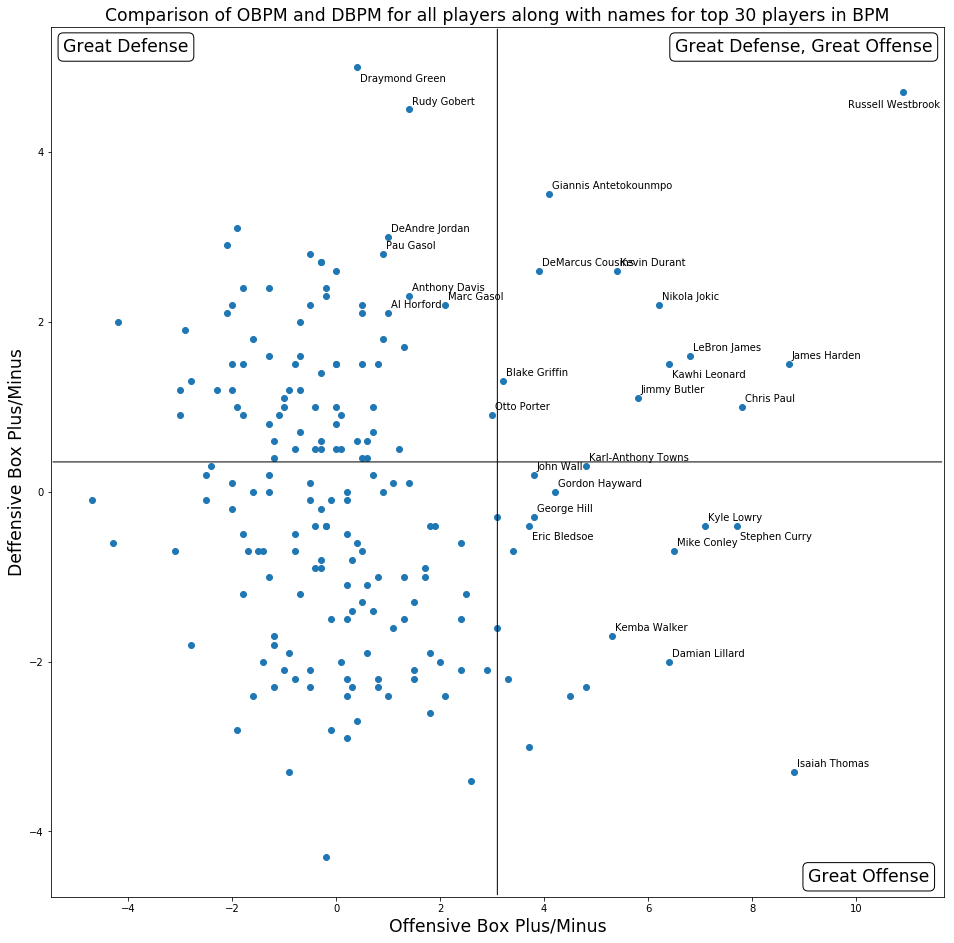

In [308]:
plt.figure(figsize=(16, 16))
plt.scatter(filtered_top_bpm.iloc[:]['OBPM'], filtered_top_bpm.iloc[:]['DBPM'])
for i in range(len(filtered_top_bpm)):
    if i >= 30:
        continue
    xy_text = (3, 5)
    name = filtered_top_bpm.iloc[i]['Player']
    if name == "Stephen Curry" or name == "Kawhi Leonard" or name == "Eric Bledsoe":
        xy_text = (3, -14)
    if name == 'Russell Westbrook':
        xy_text = (-55, -15)
    if name == 'Draymond Green':
        xy_text = (3, -15)
    plt.annotate(s= name
                , xy=(filtered_top_bpm.iloc[i]['OBPM'], filtered_top_bpm.iloc[i]['DBPM'])
                ,xycoords = "data", textcoords='offset points', xytext=xy_text)
    
plt.xlim()
plt.annotate(s="", xy=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[0]), 
             xytext=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[1]), 
             arrowprops=dict(arrowstyle="-",
                    connectionstyle="arc3"))

plt.annotate(s="", xy=(plt.xlim()[0], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             xytext=(plt.xlim()[1], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="Great Defense", xy=(plt.xlim()[0],plt.ylim()[1]),
             textcoords="offset points", xytext=(75, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Great Defense, Great Offense", xy=(plt.xlim()[1],plt.ylim()[1]),
             textcoords="offset points", xytext=(-140, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Great Offense", xy=(plt.xlim()[1],plt.ylim()[0]),
             textcoords="offset points", xytext=(-75, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.xlabel("Offensive Box Plus/Minus", size="xx-large")
plt.ylabel("Deffensive Box Plus/Minus", size="xx-large")
plt.title("Comparison of OBPM and DBPM for all players along with names for top 30 players in BPM", size="xx-large")
plt.show()

## Defensive vs Offensive win shares for top 30 players in WS

In [287]:
WS_sorted = curr_season.sort_values(by='WS', ascending=False)

In [298]:
ws_top = WS_sorted[:30]
filtered_top_ws = ws_top.loc[:, ['Player', 'WS', 'DWS', 'OWS']]

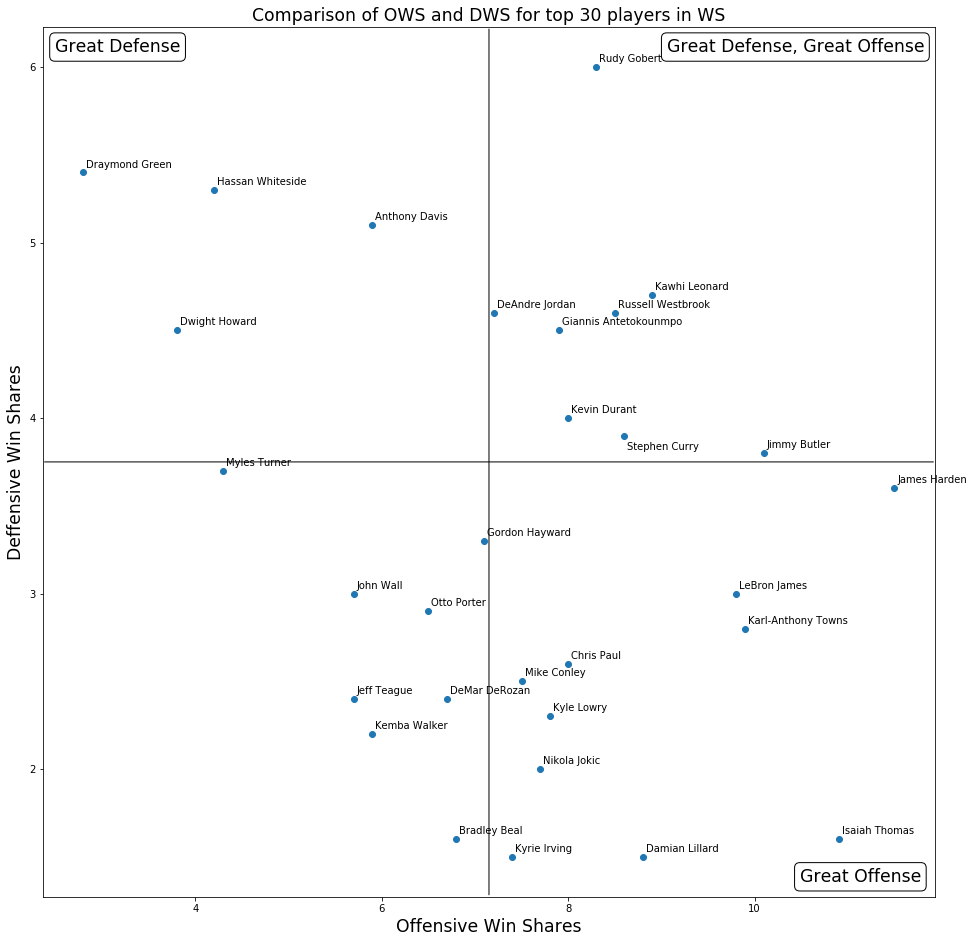

In [299]:
plt.figure(figsize=(16, 16))
plt.scatter(filtered_top_ws.iloc[:]['OWS'], filtered_top_ws.iloc[:]['DWS'])
for i in range(len(filtered_top_ws)):
    xy_text = (3, 5)
    name = filtered_top_ws.iloc[i]['Player']
    if name == "Stephen Curry":
        xy_text = (3, -14)
    plt.annotate(s= name
                , xy=(filtered_top_ws.iloc[i]['OWS'], filtered_top_ws.iloc[i]['DWS'])
                ,xycoords = "data", textcoords='offset points', xytext=xy_text)
    
plt.xlim()
plt.annotate(s="", xy=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[0]), 
             xytext=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[1]), 
             arrowprops=dict(arrowstyle="-",
                    connectionstyle="arc3"))

plt.annotate(s="", xy=(plt.xlim()[0], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             xytext=(plt.xlim()[1], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="Great Defense", xy=(plt.xlim()[0],plt.ylim()[1]),
             textcoords="offset points", xytext=(75, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Great Defense, Great Offense", xy=(plt.xlim()[1],plt.ylim()[1]),
             textcoords="offset points", xytext=(-140, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Great Offense", xy=(plt.xlim()[1],plt.ylim()[0]),
             textcoords="offset points", xytext=(-75, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.xlabel("Offensive Win Shares", size="xx-large")
plt.ylabel("Deffensive Win Shares", size="xx-large")
plt.title("Comparison of OWS and DWS for top 30 players in WS", size="xx-large")
plt.show()

In [300]:
ws_top = WS_sorted[:194]
filtered_top_ws = ws_top.loc[:, ['Player', 'WS', 'DWS', 'OWS']]

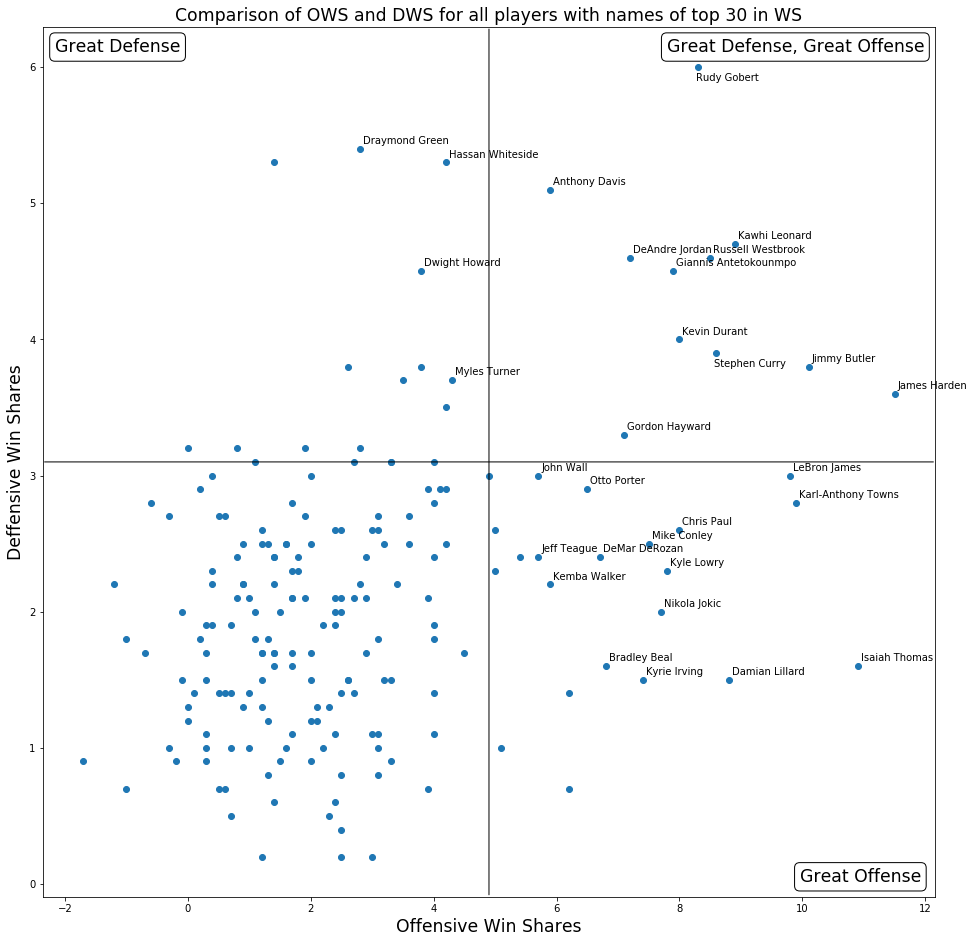

In [314]:
plt.figure(figsize=(16, 16))
plt.scatter(filtered_top_ws.iloc[:]['OWS'], filtered_top_ws.iloc[:]['DWS'])
for i in range(len(filtered_top_ws)):
    if i > 29:
        continue
    xy_text = (3, 5)
    name = filtered_top_ws.iloc[i]['Player']
    if name == "Stephen Curry" or name == "Rudy Gobert":
        xy_text = (-2, -14)
    plt.annotate(s= name
                , xy=(filtered_top_ws.iloc[i]['OWS'], filtered_top_ws.iloc[i]['DWS'])
                ,xycoords = "data", textcoords='offset points', xytext=xy_text)
    
plt.xlim()
plt.annotate(s="", xy=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[0]), 
             xytext=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[1]), 
             arrowprops=dict(arrowstyle="-",
                    connectionstyle="arc3"))

plt.annotate(s="", xy=(plt.xlim()[0], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             xytext=(plt.xlim()[1], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="Great Defense", xy=(plt.xlim()[0],plt.ylim()[1]),
             textcoords="offset points", xytext=(75, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Great Defense, Great Offense", xy=(plt.xlim()[1],plt.ylim()[1]),
             textcoords="offset points", xytext=(-140, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Great Offense", xy=(plt.xlim()[1],plt.ylim()[0]),
             textcoords="offset points", xytext=(-75, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))
plt.xlabel("Offensive Win Shares", size="xx-large")
plt.ylabel("Deffensive Win Shares", size="xx-large")
plt.title("Comparison of OWS and DWS for all players with names of top 30 in WS", size="xx-large")
plt.show()

## Displaying best rebounders preferences

In [214]:
TRB_percent_sorted = curr_season.sort_values(by='TRB%', ascending=False)
top_rebs = TRB_percent_sorted[:30]

In [215]:
filtered_top_reb = top_rebs.loc[:, ['Player', 'TRB%', 'DRB%', 'ORB%']]

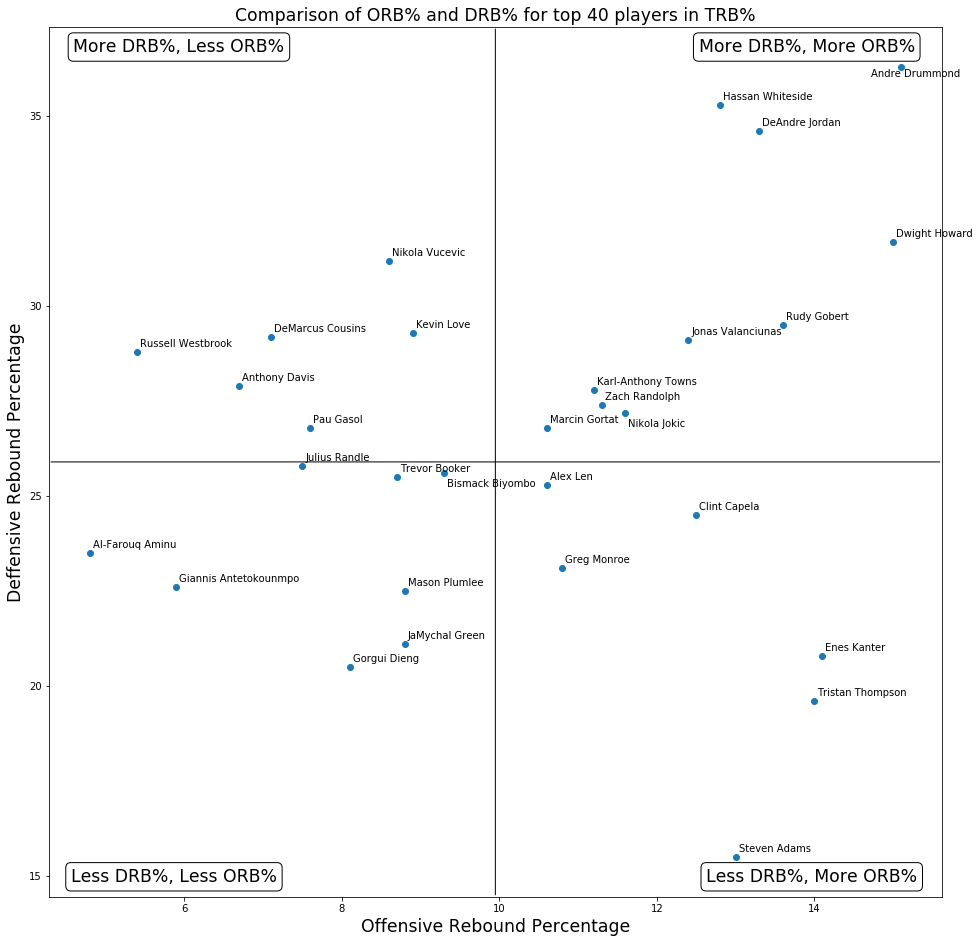

In [216]:
plt.figure(figsize=(16, 16))
plt.scatter(filtered_top_reb.iloc[:]['ORB%'], filtered_top_reb.iloc[:]['DRB%'])
for i in range(len(filtered_top_reb)):
    xy_text = (3, 5)
    name = filtered_top_reb.iloc[i]['Player']
    if name == "Nikola Jokic" or name == "Bismack Biyombo":
        xy_text = (3, -14)
    if name == "Andre Drummond":
        xy_text = (-30, -10)
    if name == "Kelly Olynyk":
        xy_text = (-30, -10)
    if name == "Draymond Green":
        xy_text = (-30, 5)
    plt.annotate(s= name
                , xy=(filtered_top_reb.iloc[i]['ORB%'], filtered_top_reb.iloc[i]['DRB%'])
                ,xycoords = "data", textcoords='offset points', xytext=xy_text)
    
plt.xlim()
plt.annotate(s="", xy=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[0]), 
             xytext=((plt.xlim()[0] + plt.xlim()[1]) / 2, plt.ylim()[1]), 
             arrowprops=dict(arrowstyle="-",
                    connectionstyle="arc3"))

plt.annotate(s="", xy=(plt.xlim()[0], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             xytext=(plt.xlim()[1], (plt.ylim()[0] + plt.ylim()[1]) / 2), 
             arrowprops=dict(arrowstyle="-"))

plt.annotate(s="More DRB%, Less ORB%", xy=(plt.xlim()[0],plt.ylim()[1]),
             textcoords="offset points", xytext=(130, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="More DRB%, More ORB%", xy=(plt.xlim()[1],plt.ylim()[1]),
             textcoords="offset points", xytext=(-135, -20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Less DRB%, Less ORB%", xy=(plt.xlim()[0],plt.ylim()[0]),
             textcoords="offset points", xytext=(125, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.annotate(s="Less DRB%, More ORB%", xy=(plt.xlim()[1],plt.ylim()[0]),
             textcoords="offset points", xytext=(-130, 20),
             va="center", ha="center", size="xx-large",
             bbox=dict(boxstyle="round", fc="w"))

plt.xlabel("Offensive Rebound Percentage", size="xx-large")
plt.ylabel("Deffensive Rebound Percentage", size="xx-large")
plt.title("Comparison of ORB% and DRB% for top 40 players in TRB%", size="xx-large")
plt.show()

## Determining effects of usage on true shooting percentage

In [229]:
usage_sorted = curr_season.sort_values(by='USG%', ascending=False)
most_used = usage_sorted[:240]

In [230]:
filtered_usage = most_used.loc[:, ['Player', 'USG%', 'TS%']]

In [246]:
usages_players, ts_players = [], []
for i in range(len(filtered_usage)):
    usages_players.append((filtered_usage.iloc[i]['Player'], filtered_usage.iloc[i]['USG%']))
    ts_players.append((filtered_usage.iloc[i]['Player'], filtered_usage.iloc[i]['TS%']))

most_used = sorted(usages_players, key=lambda x : x[1], reverse=True)
most_used = most_used[:20]
most_efficient = sorted(ts_players, key = lambda x : x[1], reverse = True)
least_efficient = most_efficient[-10:]
most_efficient = most_efficient[:20]

most_used_players = [player for player, usage in most_used]
most_efficient_players = [player for player, ts in most_efficient]
least_efficient_players = [player for player, ts in least_efficient]

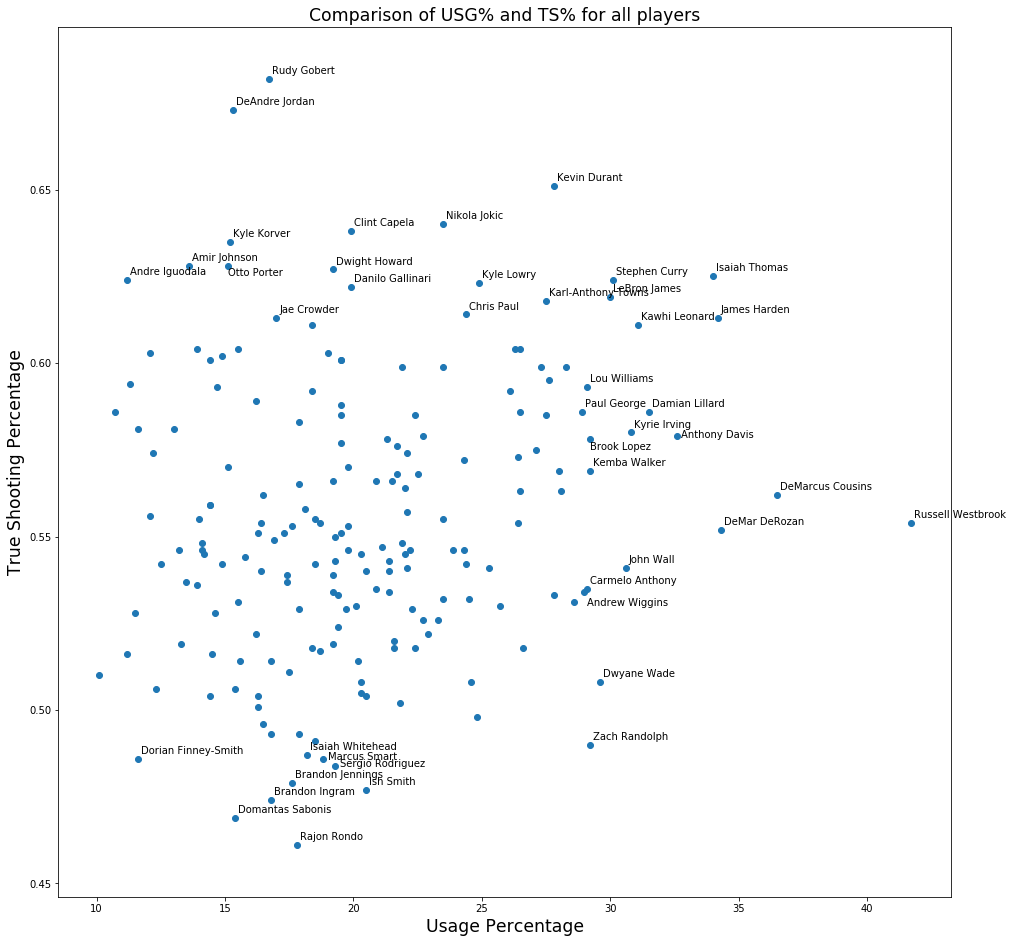

In [310]:
plt.figure(figsize=(16, 16))
plt.scatter(filtered_usage.iloc[:]['USG%'], filtered_usage.iloc[:]['TS%'])
for i in range(len(filtered_usage)):
    name = filtered_usage.iloc[i]['Player']
    if name not in most_efficient_players and name not in most_used_players and name not in least_efficient_players:
        continue
    xy_text = (3, 5)
    if name == "Devin Booker" or name == "Andrew Wiggins":
        xy_text = (3, -14)
    if name == "Sergio Rodriguez" or name == "Marcus Smart":
        xy_text = (5, -1)
    if name == "Otto Porter" or name == "Brook Lopez":
        xy_text = (0, -10)
    if name == "Anthony Davis":
        xy_text = (4, -2)
    plt.annotate(s= name
                , xy=(filtered_usage.iloc[i]['USG%'], filtered_usage.iloc[i]['TS%'])
                ,xycoords = "data", textcoords='offset points', xytext=xy_text)

plt.xlabel("Usage Percentage", size="xx-large")
plt.ylabel("True Shooting Percentage", size="xx-large")
plt.title("Comparison of USG% and TS% for all players", size="xx-large")
plt.show()

## Analysing percentage of three pointers in top 30 scorers

In [311]:
i_years = range(1980, 2018)
all_years = [float(year) for year in i_years]

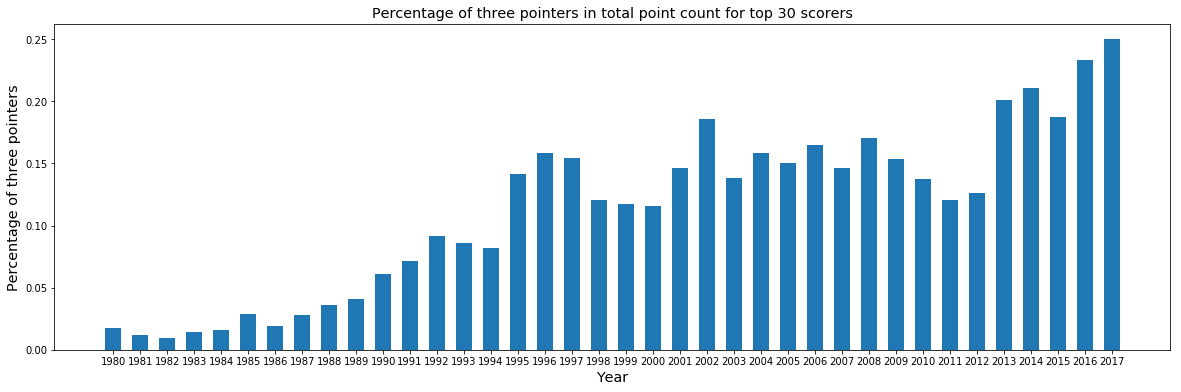

In [312]:
plt.figure(figsize=(20, 6))
three_pts_percentage = []
for year in all_years:
    current_season = season_stats.loc[season_stats.Year == year]
    current_season = remove_duplicate_players(current_season)
    current_season = current_season.sort_values(by='PTS', ascending=False)
    current_season = current_season[:30]
    curr_pts, curr_threes = 0, 0
    for i in range(len(current_season)):
        curr_pts += current_season.iloc[i]['PTS']
        curr_threes += (current_season.iloc[i]['3P'] * 3)
    three_pts_percentage.append(float(curr_threes) / float(curr_pts))

plt.bar(i_years, three_pts_percentage,tick_label=i_years, width=0.6, align="center")
plt.xlabel("Year", size="x-large")
plt.ylabel("Percentage of three pointers", size="x-large")
plt.title("Percentage of three pointers in total point count for top 30 scorers", size="x-large")

## Displaying points from 2p shots and 3p shots in same bar for each year

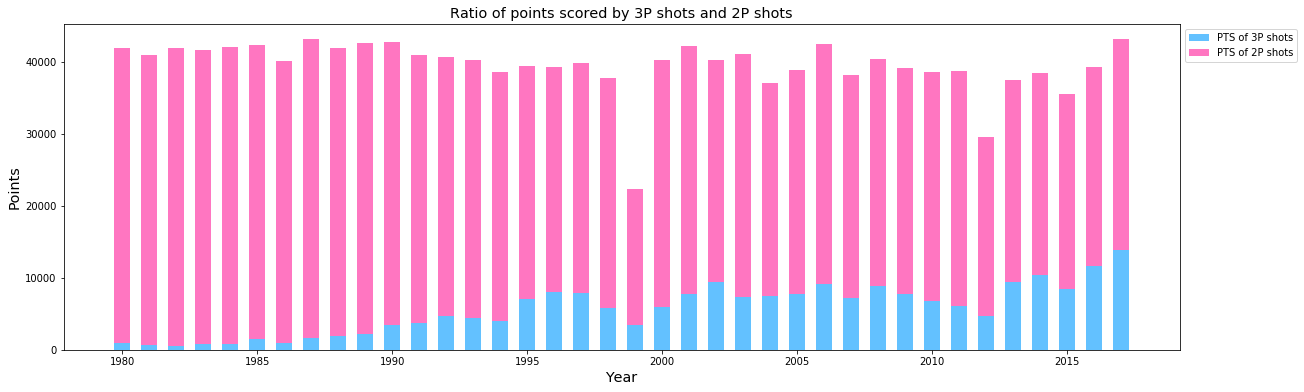

In [313]:
three_pointers, points = [], []
for year in all_years:
    current_season = season_stats.loc[season_stats.Year == year]
    current_season = remove_duplicate_players(current_season)
    current_season = current_season.sort_values(by='PTS', ascending=False)
    current_season = current_season[:30]
    curr_pts, curr_threes = 0, 0
    for i in range(len(current_season)):
        curr_pts += (current_season.iloc[i]['2P'] * 2)
        curr_threes += (current_season.iloc[i]['3P'] * 3)
    three_pointers.append(curr_threes)
    points.append(curr_pts)
    
mpl_fig = plt.figure(figsize=(20, 6))
ax = mpl_fig.add_subplot(111)

width = 0.6
bar1 = ax.bar(i_years, three_pointers, width, color=(0.389, 0.756, 1.0))
bar2 = ax.bar(i_years, points, width, color=(1.0, 0.464, 0.756), bottom=three_pointers)
#plt.bar(i_years, three_pts_percentage,tick_label=i_years, width=width, align="center")
ax.set_xlabel("Year", size="x-large")
ax.set_ylabel("Points", size="x-large")
ax.set_title("Ratio of points scored by 3P shots and 2P shots", size="x-large")
ax.legend((bar1[0], bar2[0]), ('PTS of 3P shots', 'PTS of 2P shots'), loc="upper left", bbox_to_anchor=(1, 1))